In [54]:
import requests
import pandas as pd

API_KEY = "i2t7mT7PlCji7dbJtHzqhLIqW897b1n7cfrAuvCW"
url = "https://api.eia.gov/v2/petroleum/pri/gnd/data/"

params = {
    "api_key": API_KEY,
    "frequency": "weekly",
    "data[0]": "value",
    "start": "2023-01-01",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 1000
}

response = requests.get(url, params=params)

if response.status_code == 200:
    df = pd.DataFrame(response.json()["response"]["data"])
    print("✅ Success! Here's what the columns look like:")
    print(df.columns.tolist())
    print("\nValid duoarea-name values:")
    print(df["area-name"].unique())
    print("\nValid product-name values:")
    print(df["product-name"].unique())
else:
    print("Error:", response.status_code)
    print(response.text)

✅ Success! Here's what the columns look like:
['period', 'duoarea', 'area-name', 'product', 'product-name', 'process', 'process-name', 'series', 'series-description', 'value', 'units']

Valid duoarea-name values:
['MASSACHUSETTS' 'DENVER' 'U.S.' 'MINNESOTA' 'TEXAS' 'PADD 3' 'COLORADO'
 'PADD 1A' 'PADD 1' 'PADD 1C' 'NEW YORK CITY' 'PADD 1B' 'PADD 2'
 'NEW YORK' 'FLORIDA' 'PADD 5' 'PADD 4' 'CLEVELAND' 'CALIFORNIA'
 'SAN FRANCISCO' 'LOS ANGELES' 'PADD 5 EXCEPT CALIFORNIA' 'OHIO' 'BOSTON'
 'MIAMI' 'SEATTLE' 'CHICAGO' 'HOUSTON' 'WASHINGTON']

Valid product-name values:
['Reformulated Motor Gasoline' 'Conventional Gasoline (No Oxy)'
 'Conventional Regular Gasoline' 'Regular Gasoline' 'Total Gasoline'
 'Premium Gasoline' 'Reformulated Regular Gasoline'
 'Gasoline Reformulated Midgrade' 'Midgrade Gasoline'
 'No 2 Diesel Low Sulfur (0-15 ppm)' 'Gasoline Conventional Midgrade'
 'Reformulated Premium Gasoline' 'Conventional Premium Gasoline'
 'No 2 Diesel']


In [88]:
import requests
import pandas as pd

API_KEY = "i2t7mT7PlCji7dbJtHzqhLIqW897b1n7cfrAuvCW"

series_ids = {
    "U.S.": "PET.EMM_EPM0_PTE_NUS_DPG.W",
    "East Coast (PADD 1)": "PET.EMM_EPM0_PTE_R10_DPG.W",
    "New England (PADD 1A)": "PET.EMM_EPM0_PTE_R1X_DPG.W",
    "Central Atlantic (PADD 1B)": "PET.EMM_EPM0_PTE_R1Y_DPG.W",
    "Lower Atlantic (PADD 1C)": "PET.EMM_EPM0_PTE_R1Z_DPG.W",
    "Midwest (PADD 2)": "PET.EMM_EPM0_PTE_R20_DPG.W",
    "Gulf Coast (PADD 3)": "PET.EMM_EPM0_PTE_R30_DPG.W",
    "Rocky Mountain (PADD 4)": "PET.EMM_EPM0_PTE_R40_DPG.W",
    "West Coast (PADD 5)": "PET.EMM_EPM0_PTE_R50_DPG.W",
    "California": "PET.EMM_EPM0_PTE_SCA_DPG.W",
    "Colorado": "PET.EMM_EPM0_PTE_SCO_DPG.W",
    "Florida": "PET.EMM_EPM0_PTE_SFL_DPG.W",
    "Massachusetts": "PET.EMM_EPM0_PTE_SMA_DPG.W",
    "Minnesota": "PET.EMM_EPM0_PTE_SMN_DPG.W",
    "New York": "PET.EMM_EPM0_PTE_SNY_DPG.W",
    "Ohio": "PET.EMM_EPM0_PTE_SOH_DPG.W",
    "Texas": "PET.EMM_EPM0_PTE_STX_DPG.W",
    "Washington": "PET.EMM_EPM0_PTE_SWA_DPG.W",
    "Boston, MA": "PET.EMM_EPM0_PTE_YBOS_DPG.W",
    "Chicago": "PET.EMM_EPM0_PTE_YORD_DPG.W",
    "Cleveland, OH": "PET.EMM_EPM0_PTE_YCLE_DPG.W",
    "Denver": "PET.EMM_EPM0_PTE_YDEN_DPG.W",
    "Houston": "PET.EMM_EPM0_PTE_Y44HO_DPG.W",
    "Los Angeles": "PET.EMM_EPM0_PTE_Y05LA_DPG.W",
    "Miami, FL": "PET.EMM_EPM0_PTE_YMIA_DPG.W",
    "New York City": "PET.EMM_EPM0_PTE_Y35NY_DPG.W",
    "San Francisco": "PET.EMM_EPM0_PTE_Y05SF_DPG.W",
    "Seattle, WA": "PET.EMM_EPM0_PTE_Y48SE_DPG.W"
}


all_dfs = []

for region, sid in series_ids.items():
    url = f"https://api.eia.gov/v2/seriesid/{sid}"
    params = {
        "api_key": API_KEY,
        "start": "2015-01-01",
        "end": "2025-01-01",
        "offset": 0,
        "length": 5000,
        "sort[0][column]": "period",
        "sort[0][direction]": "desc"
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()["response"]["data"]
        df = pd.DataFrame(data)
        df["period"] = pd.to_datetime(df["period"])
        df["region"] = region
        all_dfs.append(df)
        print(f"✅ {region}: {len(df)} rows")
    else:
        print(f"❌ {region}: Failed to fetch - {response.status_code}")
        print(response.text)

# Combine all regions
df_all = pd.concat(all_dfs)
df_all = df_all.sort_values(["region", "period"])

# Show the result
print(df_all[["period", "region", "value"]].head())

✅ U.S.: 1669 rows
✅ East Coast (PADD 1): 1669 rows
✅ New England (PADD 1A): 1669 rows
✅ Central Atlantic (PADD 1B): 1669 rows
✅ Lower Atlantic (PADD 1C): 1669 rows
✅ Midwest (PADD 2): 1669 rows
✅ Gulf Coast (PADD 3): 1669 rows
✅ Rocky Mountain (PADD 4): 1669 rows
✅ West Coast (PADD 5): 1669 rows
✅ California: 1297 rows
✅ Colorado: 1295 rows
✅ Florida: 1140 rows
✅ Massachusetts: 1140 rows
✅ Minnesota: 1295 rows
✅ New York: 1295 rows
✅ Ohio: 1140 rows
✅ Texas: 1295 rows
✅ Washington: 1140 rows
✅ Boston, MA: 1140 rows
✅ Chicago: 1295 rows
✅ Cleveland, OH: 1140 rows
✅ Denver: 1295 rows
✅ Houston: 1295 rows
✅ Los Angeles: 1295 rows
✅ Miami, FL: 1140 rows
✅ New York City: 1295 rows
✅ San Francisco: 1295 rows
✅ Seattle, WA: 1140 rows
         period      region  value
1139 2003-05-26  Boston, MA  1.555
1138 2003-06-02  Boston, MA  1.547
1137 2003-06-09  Boston, MA  1.534
1136 2003-06-16  Boston, MA  1.549
1135 2003-06-23  Boston, MA  1.544


In [89]:
df_all.shape  # Show the shape of the combined DataFrame

(38388, 12)

In [78]:
# Show unique regions to confirm all are included
print("Unique regions in the data:")
print(df_all["region"].unique())

Unique regions in the data:
['Boston' 'Cleveland' 'Denver' 'East Coast (PADD 1)' 'Gulf Coast (PADD 3)'
 'Miami' 'Midwest (PADD 2)' 'Rocky Mountain (PADD 4)' 'U.S.'
 'West Coast (PADD 5)']


In [90]:
df_wide = df_all.pivot(index="period", columns="region", values="value")

In [91]:
df_wide

region,"Boston, MA",California,Central Atlantic (PADD 1B),Chicago,"Cleveland, OH",Colorado,Denver,East Coast (PADD 1),Florida,Gulf Coast (PADD 3),...,New York,New York City,Ohio,Rocky Mountain (PADD 4),San Francisco,"Seattle, WA",Texas,U.S.,Washington,West Coast (PADD 5)
period,,,,,,,,,,,,,,,,,,,,,
1993-04-05,NaN,NaN,1.068,NaN,NaN,NaN,NaN,1.040,NaN,1.064,...,NaN,NaN,NaN,1.093,NaN,NaN,NaN,1.068,NaN,1.152
1993-04-12,NaN,NaN,1.072,NaN,NaN,NaN,NaN,1.047,NaN,1.071,...,NaN,NaN,NaN,1.118,NaN,NaN,NaN,1.079,NaN,1.154
1993-04-19,NaN,NaN,1.077,NaN,NaN,NaN,NaN,1.054,NaN,1.081,...,NaN,NaN,NaN,1.120,NaN,NaN,NaN,1.079,NaN,1.155
1993-04-26,NaN,NaN,1.080,NaN,NaN,NaN,NaN,1.059,NaN,1.081,...,NaN,NaN,NaN,1.169,NaN,NaN,NaN,1.086,NaN,1.157
1993-05-03,NaN,NaN,1.084,NaN,NaN,NaN,NaN,1.062,NaN,1.084,...,NaN,NaN,NaN,1.161,NaN,NaN,NaN,1.086,NaN,1.161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,3.179,4.733,3.260,3.488,3.131,3.109,3.129,3.124,3.116,2.801,...,3.212,3.165,2.964,3.140,5.028,4.354,2.772,3.255,4.106,4.332
2025-03-03,3.140,4.655,3.235,3.429,2.994,3.022,3.040,3.089,3.090,2.735,...,3.180,3.137,2.840,3.083,4.880,4.319,2.683,3.206,4.092,4.281
2025-03-10,3.129,4.597,3.188,3.471,2.997,2.988,2.984,3.058,3.094,2.780,...,3.147,3.085,2.868,3.078,4.766,4.281,2.767,3.197,4.043,4.235


In [103]:
df_all.to_csv("gasoline_prices.csv", index=False)

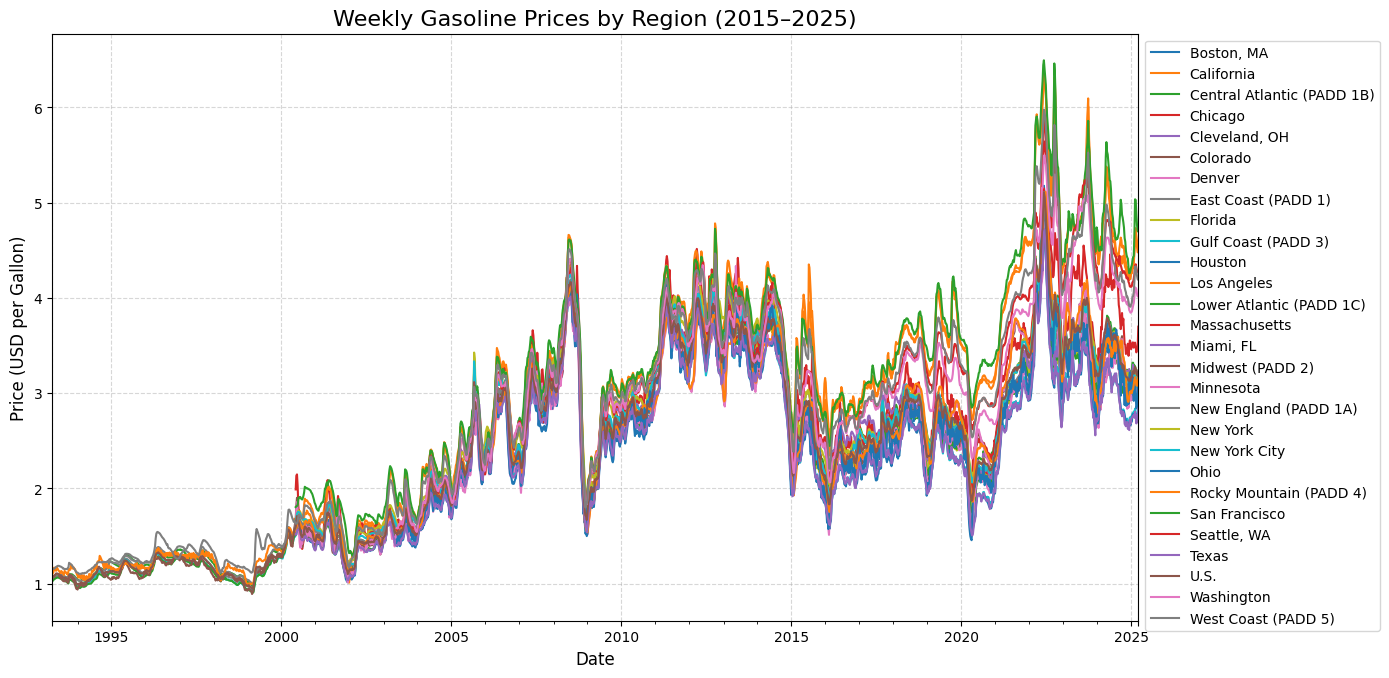

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
df_wide.plot(ax=plt.gca(), linewidth=1.5)

plt.title("Weekly Gasoline Prices by Region (2015–2025)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD per Gallon)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0), ncol=1)
plt.tight_layout()
plt.show()

In [93]:
import plotly.express as px

# Assuming df_all is your long-format DataFrame with columns:
# ['period', 'region', 'value']

fig = px.line(
    df_all,
    x="period",
    y="value",
    color="region",
    title="🛢️ Weekly Gasoline Prices by Region (2015–2025)",
    labels={"value": "Price (USD per Gallon)", "period": "Date", "region": "Region"},
    template="plotly_white"
)

fig.update_layout(
    legend_title_text='Region',
    hovermode="x unified",
    height=650
)

fig.show()

In [94]:
top_regions = ["California", "Texas", "New York", "U.S."]
df_filtered = df_all[df_all["region"].isin(top_regions)]

fig = px.line(
    df_filtered,
    x="period",
    y="value",
    color="region",
    title="🛢️ Weekly Gasoline Prices for Top Regions (2015–2025)",
    labels={"value": "Price (USD per Gallon)", "period": "Date", "region": "Region"},
    template="plotly_white"
)
fig.update_layout(
    legend_title_text='Region',
    hovermode="x unified",
    height=650
)
fig.show()

In [11]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

# Load the cleaned data
df = pd.read_csv("gasoline_prices.csv")
df["period"] = pd.to_datetime(df["period"])

# PostgreSQL credentials
db_name = "gasoline_price_tracker"
user = "postgres"
password = "123"
host = "localhost"
port = "5432"

# Create SQLAlchemy engine
engine = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{db_name}")

# Push to PostgreSQL
df.to_sql("gasoline_prices", engine, if_exists="replace", index=False)

print("✅ Data uploaded to PostgreSQL!")

✅ Data uploaded to PostgreSQL!
